In [1]:

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import argparse
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_info = pd.read_csv('ImgHESInfo.csv')

In [3]:
img_info.head()

,ID (anonyme),ID PATIENT,SAMPLE_id,Envoi Iarc,scanner utilisé,agrandissement,HES. IHC,Code Diag,Diagnostique,Origine
0,TNE0001,393,NaN,03/11/2020,Leica,x40,HES,CA,Atypical,Milan
1,TNE0002,400,NaN,03/11/2020,Leica,x40,HES,CA,Atypical,Milan
2,TNE0003,492,NaN,03/11/2020,Leica,x40,HES,CT,Typical,Milan
3,TNE0004,609,NaN,03/11/2020,Leica,x40,HES,CT,Typical,Milan
4,TNE0005,716,NaN,03/11/2020,Leica,x40,HES,CA,Atypical,Milan


In [4]:
img_info =  img_info.rename(columns={" ID (anonyme)" : "TNEID" })

In [5]:
# tets
rootdir  = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz'

In [6]:
def get_df(rootdir):
    path_ = f'{rootdir}/TumorNormal_test/Tumor/results_table.csv'
    df_ = pd.read_csv(path_)
    return df_

In [7]:
def get_train_df(rootdir):
    path_ = f'{rootdir}/TumorNormal_train/Tumor/results_table_train.csv'
    df_ = pd.read_csv(path_)
    return df_

In [8]:
df = pd.DataFrame()
df_ = get_df(rootdir)
df = df.append(df_)
df['Set'] = ['Test'] * df.shape[0]

In [9]:
df_tr = pd.DataFrame()
df_ = get_train_df(rootdir)
df_tr = df_tr.append(df_)
df_tr['Set'] = ['Train'] * df_tr.shape[0]

In [10]:
df_all = df.append(df_tr)

In [11]:
df_all.shape

(15946, 6)

In [36]:
df_all = df_all.iloc[:,1:]

In [37]:
i = 0
df_all.iloc[i,0].split('/')[-3]

'TNE0869'

In [38]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-3])
df_all['TNEID'] = sample_id

In [39]:
sample_id = []
for i in range(df_all.shape[0]):
    sample_id.append(df_all.iloc[i,0].split('/')[-2])
df_all['Class'] = sample_id

In [40]:
mean_train = df_all.loc[(df_all['Set'] == 'Train') , 'MaxScoreAnomalyMap'].mean()
df_all['MSE'] = (mean_train - df_all['MaxScoreAnomalyMap'])**2

In [41]:
df_all.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE
0,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.232866,1.432099,Test,TNE0869,Tumor,0.001299
1,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.820434,1.217720,Test,TNE0869,Normal,0.201124
2,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.895194,1.193185,Test,TNE0869,Normal,0.139658
3,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.273948,1.532143,Test,TNE1098,Normal,0.000025
4,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.423360,1.612984,Test,TNE0869,Normal,0.023857


In [42]:
df_all.index = range(df_all.shape[0])

In [43]:
df_all.loc[df_all['Class']== 'Normal', 'BinaryLabels'] = 0

In [44]:
origin = []
for i in range(df_all.shape[0]):
    tne = df_all['TNEID'][i]
    print(tne)
    if tne == 'TNE0807' or tne == 'TNE0808':
        origin.append('Nancy')
    else:
        origin.append(img_info[img_info['TNEID'] == tne]['Origine'].values[0])

TNE0869
TNE0869
TNE0869
TNE1098
TNE0869
TNE1098
TNE0034
TNE0001
TNE0870
TNE0001
TNE0987
TNE0001
TNE0803
TNE0869
TNE0590
TNE1404
TNE0987
TNE0869
TNE0869
TNE1404
TNE0869
TNE0519
TNE1011
TNE1404
TNE1011
TNE0803
TNE0803
TNE1417
TNE1423
TNE0034
TNE1076
TNE0869
TNE1417
TNE1076
TNE1011
TNE0869
TNE1011
TNE0892
TNE1681
TNE1076
TNE0892
TNE1011
TNE0863
TNE0869
TNE0001
TNE0869
TNE0987
TNE0803
TNE0008
TNE0519
TNE0001
TNE1011
TNE0803
TNE1681
TNE0869
TNE0001
TNE0869
TNE0863
TNE0869
TNE0519
TNE1423
TNE0869
TNE0589
TNE0001
TNE1404
TNE1404
TNE1681
TNE1098
TNE1417
TNE0589
TNE0987
TNE0519
TNE0590
TNE1681
TNE1404
TNE1681
TNE1410
TNE1417
TNE1423
TNE0589
TNE0892
TNE0987
TNE1681
TNE0863
TNE1011
TNE0869
TNE1410
TNE0987
TNE1011
TNE0803
TNE0590
TNE1681
TNE1423
TNE0892
TNE0519
TNE1011
TNE0869
TNE0987
TNE0803
TNE1417
TNE1508
TNE0869
TNE0869
TNE1098
TNE1408
TNE0987
TNE0589
TNE1011
TNE1508
TNE1508
TNE1423
TNE1681
TNE0863
TNE1417
TNE0519
TNE1011
TNE0869
TNE1417
TNE0227
TNE0870
TNE0002
TNE1417
TNE1423
TNE0034
TNE1098


TNE1076
TNE0589
TNE1076
TNE0869
TNE1508
TNE1410
TNE0001
TNE1417
TNE1681
TNE0034
TNE0803
TNE1410
TNE0034
TNE1404
TNE1011
TNE0803
TNE0002
TNE0034
TNE1410
TNE0589
TNE1076
TNE0007
TNE0869
TNE1011
TNE1417
TNE1508
TNE1681
TNE0590
TNE1098
TNE0803
TNE0008
TNE1417
TNE1076
TNE1417
TNE0869
TNE1404
TNE0803
TNE0002
TNE1410
TNE0519
TNE1423
TNE1508
TNE1011
TNE0589
TNE1408
TNE1011
TNE0007
TNE1098
TNE0007
TNE0034
TNE1098
TNE0007
TNE0034
TNE0001
TNE0001
TNE0001
TNE1417
TNE0007
TNE0863
TNE1098
TNE0590
TNE1417
TNE1410
TNE1410
TNE0869
TNE0227
TNE0007
TNE0869
TNE0227
TNE0034
TNE0008
TNE0869
TNE1098
TNE1408
TNE0892
TNE0987
TNE1508
TNE0008
TNE1098
TNE1404
TNE1408
TNE1011
TNE0001
TNE0869
TNE1011
TNE0863
TNE0008
TNE0863
TNE1410
TNE0589
TNE0869
TNE1681
TNE0007
TNE0007
TNE0869
TNE0227
TNE1098
TNE1011
TNE1408
TNE1417
TNE0869
TNE0001
TNE0519
TNE0002
TNE1423
TNE0863
TNE0519
TNE0007
TNE0869
TNE1681
TNE1408
TNE1508
TNE0001
TNE1011
TNE0034
TNE0227
TNE1410
TNE1417
TNE0869
TNE1417
TNE0589
TNE0863
TNE0001
TNE0803
TNE1098


TNE0803
TNE0008
TNE0869
TNE0007
TNE1417
TNE0007
TNE0227
TNE1011
TNE0001
TNE1417
TNE0803
TNE1423
TNE0869
TNE1410
TNE1404
TNE0869
TNE0001
TNE0869
TNE1076
TNE0892
TNE0590
TNE1423
TNE1410
TNE0008
TNE0987
TNE1098
TNE0590
TNE1410
TNE1417
TNE1423
TNE0869
TNE0519
TNE0519
TNE0001
TNE1076
TNE1417
TNE1508
TNE1011
TNE0803
TNE0008
TNE1417
TNE1417
TNE0803
TNE0001
TNE0987
TNE0869
TNE0001
TNE0892
TNE0007
TNE1417
TNE0001
TNE0892
TNE1410
TNE0519
TNE1410
TNE0227
TNE0001
TNE0589
TNE1410
TNE0001
TNE0869
TNE1076
TNE0869
TNE1098
TNE1098
TNE0227
TNE1098
TNE0589
TNE0869
TNE1076
TNE0001
TNE1417
TNE1508
TNE0803
TNE1408
TNE0803
TNE0803
TNE0008
TNE0863
TNE0001
TNE0589
TNE0892
TNE0034
TNE0803
TNE1098
TNE1417
TNE0007
TNE0007
TNE0001
TNE1417
TNE1410
TNE0987
TNE0519
TNE0007
TNE0590
TNE0803
TNE0803
TNE0007
TNE0008
TNE1423
TNE0007
TNE0001
TNE0002
TNE1011
TNE0869
TNE0008
TNE1404
TNE1098
TNE1423
TNE1408
TNE0589
TNE0002
TNE1408
TNE0803
TNE1011
TNE0869
TNE1011
TNE0869
TNE0869
TNE0008
TNE1410
TNE1417
TNE0869
TNE0007
TNE0803


TNE0870
TNE1404
TNE0008
TNE1011
TNE0869
TNE1076
TNE1076
TNE0863
TNE0519
TNE1417
TNE0001
TNE1408
TNE0008
TNE1508
TNE1417
TNE1011
TNE1098
TNE0227
TNE0863
TNE0589
TNE1417
TNE0803
TNE0227
TNE0227
TNE0892
TNE1011
TNE0008
TNE1098
TNE0589
TNE1410
TNE1011
TNE0034
TNE1011
TNE1410
TNE0008
TNE1423
TNE1404
TNE0008
TNE0869
TNE0007
TNE0001
TNE0519
TNE0869
TNE0001
TNE1410
TNE0869
TNE0589
TNE0869
TNE0008
TNE0001
TNE1681
TNE0519
TNE1417
TNE1011
TNE1417
TNE0987
TNE1417
TNE1423
TNE1423
TNE1408
TNE0869
TNE0227
TNE1011
TNE0803
TNE0002
TNE1076
TNE1681
TNE0034
TNE1404
TNE0869
TNE1423
TNE1681
TNE1408
TNE0987
TNE1011
TNE1508
TNE0227
TNE0803
TNE1508
TNE1011
TNE0869
TNE0519
TNE1681
TNE0869
TNE0870
TNE1098
TNE1011
TNE0001
TNE1417
TNE1408
TNE0001
TNE0869
TNE0863
TNE1098
TNE1404
TNE1417
TNE1508
TNE0869
TNE0001
TNE0803
TNE0001
TNE1011
TNE0869
TNE0007
TNE1508
TNE1410
TNE0869
TNE0863
TNE0589
TNE0869
TNE0863
TNE0590
TNE0001
TNE1508
TNE0590
TNE0034
TNE0001
TNE1098
TNE0869
TNE0892
TNE0869
TNE0869
TNE1681
TNE0590
TNE0001


TNE0001
TNE0227
TNE1404
TNE1508
TNE1076
TNE0803
TNE1408
TNE0519
TNE0519
TNE1417
TNE1508
TNE0870
TNE1681
TNE0002
TNE0869
TNE1417
TNE0001
TNE0590
TNE1417
TNE0869
TNE1404
TNE0008
TNE0008
TNE0007
TNE0589
TNE0001
TNE0869
TNE1011
TNE1423
TNE0803
TNE1011
TNE0007
TNE0869
TNE0892
TNE1098
TNE1410
TNE1408
TNE1076
TNE1508
TNE0987
TNE0869
TNE0869
TNE0008
TNE1681
TNE0869
TNE0227
TNE0001
TNE1508
TNE0869
TNE0590
TNE1417
TNE0590
TNE0001
TNE0892
TNE1410
TNE1417
TNE1423
TNE0590
TNE0863
TNE0008
TNE0007
TNE0008
TNE0869
TNE0001
TNE1098
TNE0803
TNE1011
TNE1098
TNE0002
TNE1011
TNE1508
TNE0870
TNE1423
TNE0987
TNE0002
TNE0803
TNE0870
TNE0227
TNE0590
TNE1508
TNE0007
TNE0589
TNE0519
TNE1410
TNE0589
TNE0987
TNE0869
TNE0869
TNE1410
TNE1681
TNE1404
TNE1011
TNE1076
TNE0869
TNE1408
TNE0007
TNE0001
TNE1098
TNE0589
TNE1404
TNE0803
TNE1417
TNE0034
TNE0870
TNE0590
TNE0892
TNE0869
TNE0227
TNE1417
TNE1508
TNE0590
TNE1417
TNE0008
TNE0870
TNE1011
TNE1508
TNE0803
TNE0869
TNE1508
TNE0869
TNE0869
TNE0863
TNE1417
TNE0589
TNE0803


TNE1417
TNE1408
TNE0863
TNE1681
TNE1404
TNE0001
TNE0869
TNE0869
TNE0227
TNE0519
TNE1681
TNE0519
TNE0001
TNE0892
TNE1417
TNE1423
TNE1410
TNE0869
TNE1417
TNE0863
TNE1076
TNE1410
TNE1508
TNE1423
TNE1681
TNE1423
TNE0227
TNE1408
TNE1423
TNE0803
TNE0227
TNE1417
TNE0034
TNE1417
TNE0001
TNE0519
TNE1508
TNE1076
TNE1417
TNE1681
TNE1404
TNE0590
TNE0869
TNE0869
TNE0590
TNE0803
TNE0870
TNE0869
TNE0892
TNE0803
TNE0001
TNE1508
TNE1417
TNE1508
TNE1076
TNE1410
TNE0590
TNE0002
TNE0803
TNE1508
TNE0589
TNE0008
TNE0869
TNE1417
TNE1011
TNE1098
TNE1011
TNE0987
TNE0589
TNE0803
TNE0001
TNE1417
TNE0590
TNE1417
TNE0008
TNE0008
TNE0002
TNE0007
TNE0227
TNE1508
TNE1408
TNE0869
TNE0519
TNE0001
TNE0001
TNE1681
TNE1011
TNE0002
TNE0519
TNE1098
TNE0803
TNE1410
TNE1011
TNE1410
TNE0869
TNE1098
TNE1011
TNE1410
TNE1410
TNE0007
TNE0001
TNE0590
TNE0008
TNE1408
TNE0869
TNE0863
TNE1508
TNE0001
TNE1404
TNE1076
TNE1404
TNE1417
TNE1508
TNE1011
TNE1408
TNE1011
TNE1098
TNE0034
TNE1404
TNE0227
TNE1098
TNE0590
TNE0034
TNE0589
TNE1681


TNE0987
TNE1099
TNE0233
TNE1367
TNE0028
TNE1426
TNE0888
TNE0057
TNE1408
TNE0808
TNE0003
TNE1412
TNE2330
TNE2097
TNE0034
TNE1508
TNE0057
TNE0234
TNE0808
TNE0809
TNE2097
TNE0002
TNE1367
TNE0028
TNE1408
TNE0007
TNE1426
TNE0869
TNE1412
TNE0057
TNE1404
TNE0869
TNE0066
TNE0017
TNE0340
TNE1006
TNE1093
TNE0007
TNE1408
TNE0080
TNE0066
TNE0066
TNE0233
TNE0590
TNE1006
TNE1011
TNE0234
TNE0066
TNE0002
TNE0863
TNE1098
TNE1446
TNE1093
TNE2158
TNE1365
TNE0080
TNE0590
TNE0001
TNE0888
TNE1356
TNE1404
TNE0066
TNE0017
TNE1095
TNE1365
TNE0589
TNE0001
TNE1095
TNE0056
TNE0017
TNE1404
TNE0869
TNE1508
TNE0987
TNE1428
TNE1426
TNE0541
TNE0028
TNE2330
TNE1446
TNE1681
TNE0863
TNE1412
TNE0008
TNE0803
TNE0340
TNE0003
TNE1098
TNE1076
TNE0080
TNE0340
TNE1438
TNE1426
TNE0808
TNE1412
TNE1412
TNE1367
TNE1356
TNE2330
TNE2097
TNE2127
TNE0541
TNE0519
TNE0340
TNE0060
TNE0034
TNE0808
TNE1426
TNE1093
TNE0028
TNE0809
TNE0066
TNE0060
TNE0228
TNE0003
TNE0066
TNE0809
TNE0003
TNE0080
TNE1681
TNE1446
TNE0028
TNE2127
TNE0888
TNE0863


TNE0028
TNE0002
TNE0227
TNE1356
TNE1013
TNE1006
TNE1408
TNE1338
TNE1438
TNE2097
TNE0233
TNE1681
TNE2330
TNE1428
TNE2097
TNE1428
TNE1076
TNE0590
TNE0519
TNE1404
TNE0056
TNE1365
TNE0809
TNE0057
TNE0067
TNE2097
TNE1099
TNE1013
TNE2097
TNE1412
TNE0003
TNE0080
TNE1013
TNE1412
TNE0519
TNE0229
TNE0056
TNE0803
TNE0080
TNE0541
TNE0234
TNE0080
TNE1428
TNE1412
TNE0060
TNE2127
TNE1099
TNE1508
TNE1365
TNE0809
TNE0066
TNE1446
TNE1099
TNE1011
TNE0892
TNE1408
TNE1367
TNE2330
TNE1681
TNE2127
TNE1367
TNE0066
TNE0870
TNE0229
TNE0057
TNE1367
TNE0229
TNE1408
TNE1365
TNE0057
TNE1412
TNE1438
TNE0888
TNE1412
TNE1410
TNE0809
TNE1410
TNE0002
TNE0809
TNE0066
TNE0066
TNE0809
TNE0229
TNE1365
TNE1412
TNE0057
TNE0809
TNE0229
TNE2330
TNE0080
TNE0541
TNE0519
TNE1013
TNE0892
TNE0003
TNE1508
TNE1099
TNE0067
TNE0541
TNE0003
TNE1006
TNE0870
TNE1428
TNE0870
TNE0228
TNE0808
TNE1013
TNE0007
TNE1426
TNE0003
TNE1356
TNE1338
TNE1428
TNE0541
TNE1356
TNE0060
TNE0519
TNE1508
TNE1365
TNE1367
TNE0034
TNE0589
TNE1365
TNE1356
TNE0228


TNE0590
TNE1013
TNE0060
TNE1681
TNE1426
TNE1428
TNE1011
TNE0080
TNE1408
TNE0234
TNE1095
TNE0888
TNE2330
TNE1098
TNE0340
TNE1412
TNE1365
TNE1356
TNE1426
TNE1438
TNE1426
TNE0007
TNE0080
TNE0987
TNE1426
TNE2127
TNE0869
TNE1681
TNE0057
TNE0229
TNE1093
TNE0060
TNE1076
TNE0870
TNE0067
TNE1093
TNE0057
TNE0057
TNE0541
TNE0519
TNE0863
TNE1681
TNE1446
TNE0034
TNE1006
TNE0017
TNE1350
TNE0888
TNE1508
TNE1412
TNE0007
TNE1410
TNE0008
TNE1412
TNE2097
TNE1011
TNE0028
TNE0863
TNE1408
TNE0869
TNE0057
TNE0007
TNE2097
TNE0229
TNE0080
TNE0080
TNE1350
TNE0066
TNE0066
TNE1408
TNE0007
TNE1013
TNE0809
TNE0066
TNE0007
TNE1446
TNE0002
TNE1412
TNE2330
TNE1438
TNE1367
TNE0234
TNE0067
TNE1681
TNE0228
TNE0228
TNE1076
TNE0233
TNE1681
TNE1426
TNE2127
TNE0034
TNE1412
TNE1412
TNE0340
TNE1412
TNE0519
TNE0028
TNE1076
TNE0869
TNE0034
TNE0340
TNE0056
TNE1013
TNE1006
TNE0870
TNE0008
TNE1426
TNE0541
TNE1508
TNE1446
TNE0808
TNE0809
TNE0080
TNE0017
TNE2097
TNE1426
TNE1098
TNE0987
TNE2330
TNE0803
TNE0803
TNE0003
TNE0233
TNE0519


TNE0808
TNE1446
TNE0034
TNE0541
TNE1338
TNE0888
TNE1076
TNE0007
TNE0233
TNE0227
TNE0234
TNE1011
TNE0589
TNE0066
TNE1438
TNE1681
TNE0056
TNE1423
TNE0888
TNE0001
TNE2127
TNE1508
TNE0808
TNE0056
TNE0803
TNE0541
TNE1098
TNE1446
TNE0057
TNE1356
TNE0541
TNE0229
TNE1412
TNE1011
TNE1426
TNE1410
TNE1076
TNE0002
TNE0863
TNE1095
TNE0589
TNE2097
TNE0228
TNE0870
TNE0001
TNE1356
TNE2127
TNE0017
TNE1412
TNE1426
TNE0066
TNE0590
TNE1093
TNE1446
TNE0007
TNE1404
TNE0869
TNE0590
TNE1508
TNE1410
TNE0340
TNE1013
TNE0003
TNE0001
TNE1013
TNE2097
TNE1412
TNE0028
TNE0057
TNE0809
TNE1093
TNE1365
TNE0589
TNE2158
TNE0340
TNE2097
TNE0229
TNE0987
TNE2330
TNE0080
TNE0803
TNE0233
TNE0067
TNE0066
TNE1093
TNE0034
TNE0007
TNE2127
TNE0808
TNE1408
TNE2158
TNE1006
TNE0002
TNE0987
TNE1412
TNE0589
TNE0808
TNE0589
TNE1408
TNE1438
TNE0340
TNE1508
TNE2127
TNE1426
TNE1410
TNE1006
TNE0028
TNE0340
TNE0590
TNE1508
TNE0003
TNE0056
TNE1428
TNE2158
TNE1404
TNE1365
TNE0888
TNE0234
TNE1367
TNE0017
TNE1412
TNE2127
TNE1446
TNE0888
TNE0028


TNE1508
TNE0080
TNE0234
TNE1093
TNE1426
TNE0008
TNE1076
TNE0003
TNE1408
TNE0066
TNE0340
TNE0001
TNE0057
TNE1367
TNE2127
TNE0001
TNE0067
TNE1426
TNE0809
TNE0056
TNE0057
TNE2158
TNE1426
TNE0228
TNE0017
TNE1446
TNE0080
TNE1508
TNE1095
TNE1681
TNE1338
TNE0809
TNE2158
TNE0888
TNE2097
TNE1367
TNE0017
TNE0007
TNE0519
TNE0056
TNE0057
TNE1013
TNE0869
TNE1365
TNE0863
TNE0080
TNE1013
TNE0060
TNE0809
TNE0007
TNE0066
TNE1093
TNE0228
TNE0803
TNE1412
TNE2158
TNE1426
TNE1410
TNE2097
TNE1367
TNE0870
TNE1095
TNE1412
TNE0234
TNE0519
TNE0017
TNE0803
TNE1006
TNE1681
TNE1013
TNE1426
TNE0987
TNE0001
TNE1438
TNE0233
TNE0987
TNE0227
TNE0001
TNE2158
TNE1098
TNE0003
TNE1404
TNE0034
TNE0870
TNE1410
TNE1365
TNE2127
TNE0034
TNE1006
TNE0589
TNE0808
TNE0987
TNE1006
TNE1446
TNE1508
TNE1508
TNE0888
TNE0060
TNE2158
TNE1098
TNE0340
TNE1006
TNE0519
TNE0067
TNE1011
TNE1350
TNE1446
TNE1508
TNE0228
TNE0066
TNE2158
TNE0034
TNE1681
TNE0003
TNE1423
TNE0007
TNE0519
TNE1367
TNE0234
TNE0001
TNE1410
TNE0888
TNE0056
TNE0987
TNE0589


TNE0803
TNE1006
TNE1013
TNE0060
TNE1099
TNE1681
TNE1412
TNE0034
TNE0066
TNE0892
TNE0001
TNE0080
TNE1076
TNE1356
TNE0229
TNE0869
TNE0060
TNE0863
TNE0863
TNE0870
TNE0987
TNE1338
TNE1428
TNE0589
TNE1365
TNE0888
TNE0803
TNE0060
TNE1350
TNE0234
TNE0233
TNE0541
TNE1428
TNE0008
TNE0870
TNE0028
TNE0541
TNE0340
TNE0803
TNE0017
TNE1095
TNE0541
TNE0541
TNE1508
TNE0066
TNE2097
TNE0028
TNE0008
TNE1426
TNE1093
TNE1006
TNE1428
TNE1013
TNE1438
TNE0056
TNE2127
TNE1508
TNE0080
TNE0233
TNE1093
TNE0987
TNE1095
TNE0870
TNE2127
TNE0888
TNE1508
TNE1404
TNE0007
TNE0228
TNE1356
TNE0987
TNE0060
TNE1412
TNE0057
TNE0080
TNE0227
TNE0229
TNE2097
TNE1095
TNE1681
TNE0987
TNE0541
TNE0519
TNE2127
TNE2097
TNE1426
TNE1428
TNE1423
TNE1428
TNE0590
TNE0870
TNE0017
TNE1095
TNE1408
TNE1408
TNE1099
TNE0060
TNE0808
TNE0519
TNE2127
TNE0234
TNE0589
TNE0803
TNE1365
TNE0590
TNE2097
TNE1098
TNE0034
TNE0227
TNE0803
TNE0227
TNE0987
TNE0541
TNE1408
TNE1408
TNE0034
TNE0589
TNE0007
TNE1408
TNE0002
TNE0066
TNE0008
TNE0227
TNE1681
TNE2127


TNE1095
TNE1508
TNE1365
TNE2127
TNE1099
TNE1365
TNE0228
TNE0870
TNE2097
TNE1408
TNE1011
TNE1365
TNE0233
TNE0589
TNE1412
TNE0340
TNE0519
TNE1098
TNE0228
TNE0589
TNE0028
TNE1412
TNE0001
TNE0234
TNE1356
TNE1423
TNE1428
TNE0060
TNE0060
TNE0080
TNE0519
TNE0080
TNE1438
TNE0056
TNE1446
TNE1095
TNE0007
TNE0017
TNE0066
TNE0057
TNE0001
TNE1011
TNE0809
TNE1508
TNE0987
TNE0340
TNE0987
TNE0003
TNE1681
TNE0227
TNE1681
TNE0888
TNE0888
TNE1006
TNE1367
TNE0541
TNE0080
TNE1099
TNE1412
TNE1006
TNE0803
TNE0541
TNE1367
TNE1404
TNE0809
TNE1446
TNE0892
TNE1098
TNE0034
TNE1426
TNE1093
TNE1338
TNE1404
TNE2330
TNE0234
TNE1410
TNE0233
TNE0519
TNE1006
TNE2127
TNE0803
TNE1338
TNE0007
TNE1099
TNE1365
TNE0228
TNE1681
TNE0869
TNE0008
TNE0034
TNE1426
TNE0057
TNE2127
TNE0987
TNE1410
TNE2127
TNE1681
TNE1681
TNE1426
TNE2127
TNE1446
TNE1426
TNE0028
TNE1681
TNE0008
TNE0228
TNE1428
TNE0233
TNE1426
TNE0067
TNE0589
TNE1356
TNE0888
TNE0870
TNE1681
TNE1426
TNE2127
TNE1367
TNE1423
TNE0888
TNE1508
TNE2330
TNE1404
TNE0519
TNE1011


TNE1095
TNE0001
TNE1412
TNE0057
TNE0809
TNE0803
TNE0590
TNE0034
TNE0808
TNE1076
TNE0888
TNE1367
TNE0056
TNE1076
TNE1367
TNE1356
TNE2127
TNE1428
TNE1508
TNE0227
TNE1367
TNE1350
TNE0056
TNE0888
TNE0892
TNE1410
TNE0888
TNE2158
TNE1508
TNE0808
TNE2330
TNE0590
TNE0808
TNE2330
TNE1681
TNE1681
TNE1367
TNE1410
TNE1365
TNE2127
TNE0808
TNE0892
TNE0892
TNE0590
TNE1428
TNE1076
TNE0987
TNE0863
TNE1095
TNE1423
TNE1438
TNE0340
TNE2097
TNE0017
TNE0869
TNE2330
TNE2330
TNE0869
TNE0589
TNE0060
TNE0589
TNE1013
TNE0060
TNE0808
TNE0008
TNE1508
TNE1446
TNE1367
TNE1099
TNE0869
TNE2097
TNE1367
TNE1011
TNE0003
TNE0067
TNE1006
TNE0541
TNE0809
TNE1367
TNE0066
TNE1412
TNE0017
TNE0060
TNE0541
TNE0229
TNE0589
TNE1681
TNE1356
TNE0987
TNE0001
TNE1423
TNE0057
TNE1412
TNE0067
TNE0227
TNE0080
TNE0008
TNE1365
TNE0233
TNE0869
TNE0228
TNE1410
TNE1438
TNE1681
TNE1365
TNE1365
TNE2158
TNE1412
TNE0589
TNE1508
TNE1356
TNE0028
TNE1099
TNE0003
TNE1099
TNE0987
TNE0060
TNE0803
TNE0863
TNE0034
TNE0863
TNE1438
TNE0229
TNE1011
TNE0987


TNE0589
TNE1508
TNE0066
TNE0233
TNE0340
TNE1412
TNE0034
TNE1098
TNE2330
TNE0007
TNE0987
TNE0056
TNE0066
TNE0057
TNE0803
TNE1013
TNE0007
TNE0519
TNE1408
TNE0017
TNE1438
TNE1011
TNE0017
TNE1681
TNE0028
TNE1338
TNE0863
TNE1356
TNE1356
TNE2097
TNE1367
TNE0080
TNE1338
TNE0056
TNE2097
TNE1093
TNE0007
TNE1428
TNE1367
TNE1426
TNE0590
TNE0589
TNE1428
TNE0863
TNE1408
TNE0541
TNE0590
TNE0017
TNE0987
TNE1356
TNE1338
TNE1681
TNE1095
TNE0227
TNE1006
TNE1412
TNE0229
TNE1404
TNE0017
TNE0809
TNE1093
TNE0227
TNE2158
TNE1367
TNE1417
TNE0863
TNE0066
TNE0589
TNE1508
TNE0590
TNE1404
TNE1412
TNE1011
TNE0229
TNE1356
TNE0987
TNE0227
TNE1410
TNE1438
TNE1428
TNE0340
TNE1428
TNE0017
TNE1410
TNE1013
TNE1410
TNE0589
TNE0803
TNE0017
TNE1508
TNE1099
TNE1681
TNE2330
TNE0228
TNE2097
TNE1428
TNE0234
TNE0808
TNE0057
TNE0017
TNE1428
TNE1365
TNE1006
TNE2158
TNE1428
TNE0028
TNE0002
TNE2097
TNE0034
TNE0863
TNE0234
TNE0519
TNE0028
TNE0080
TNE0589
TNE0233
TNE0227
TNE1367
TNE0227
TNE1367
TNE1350
TNE1438
TNE1365
TNE1013
TNE0229


TNE0002
TNE1098
TNE2330
TNE0002
TNE0066
TNE0056
TNE1076
TNE1099
TNE1404
TNE2330
TNE0541
TNE0060
TNE0803
TNE0067
TNE0017
TNE1367
TNE1011
TNE0870
TNE2158
TNE0870
TNE2158
TNE0056
TNE0228
TNE0003
TNE1446
TNE0034
TNE0066
TNE0066
TNE1011
TNE0008
TNE1438
TNE1412
TNE0227
TNE2127
TNE0028
TNE1428
TNE2127
TNE0066
TNE1356
TNE0002
TNE2158
TNE0340
TNE1446
TNE0808
TNE0870
TNE0007
TNE1011
TNE0060
TNE0057
TNE0869
TNE1428
TNE2158
TNE0863
TNE1508
TNE0589
TNE1408
TNE0017
TNE1006
TNE1093
TNE0340
TNE1011
TNE1099
TNE1338
TNE1098
TNE2097
TNE0808
TNE1356
TNE1681
TNE0080
TNE0863
TNE0028
TNE0067
TNE1338
TNE1098
TNE0034
TNE0003
TNE0001
TNE1356
TNE1410
TNE0007
TNE1093
TNE1099
TNE1006
TNE0589
TNE2330
TNE0987
TNE0017
TNE1410
TNE0060
TNE0066
TNE0234
TNE0869
TNE1423
TNE1006
TNE0227
TNE1408
TNE1076
TNE0888
TNE1098
TNE0002
TNE1095
TNE0056
TNE2127
TNE0003
TNE0080
TNE0809
TNE0001
TNE0863
TNE0888
TNE0228
TNE1338
TNE1098
TNE0057
TNE0541
TNE0080
TNE0519
TNE1367
TNE1013
TNE1098
TNE2097
TNE1423
TNE0234
TNE1426
TNE1095
TNE2097


In [45]:
df_all['Origin'] = origin

In [46]:
df_all = df_all[df_all['TNEID'] != 'TNE1098']

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

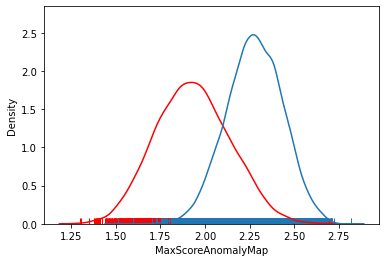

In [47]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumor']
sns.distplot(dfNormal['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

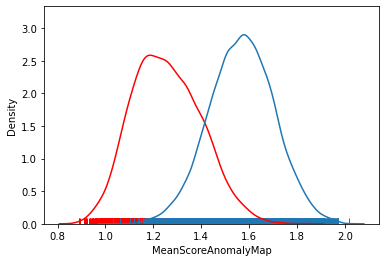

In [48]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumor']
sns.distplot(dfNormal['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MSE', ylabel='Density'>

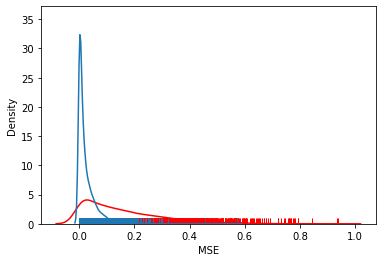

In [49]:
dfNormal = df_all.loc[df_all['Class'] == 'Normal']
dfTumor = df_all.loc[df_all['Class'] == 'Tumor']
sns.distplot(dfNormal['MSE'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MSE'], hist=False, rug=True)

<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

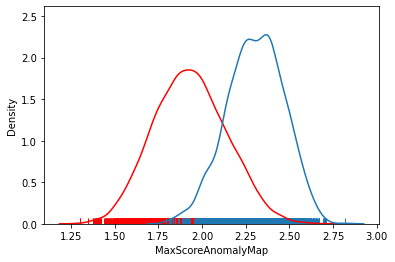

In [50]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumor']
sns.distplot(dfNorm['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MaxScoreAnomalyMap'], hist=False, rug=True)

<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

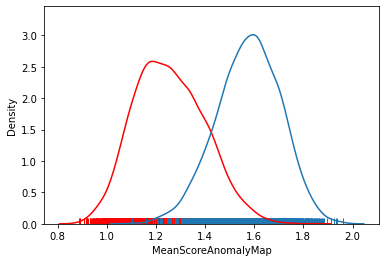

In [51]:
df_all_test = df_all[(df_all['Set'] == 'Test')]
dfNorm = df_all_test.loc[df_all_test['Class'] == 'Normal']
dfTumor = df_all_test.loc[df_all_test['Class'] == 'Tumor']
sns.distplot(dfNorm['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(dfTumor['MeanScoreAnomalyMap'], hist=False, rug=True)

In [52]:
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MaxScoreAnomalyMap']))
print(roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MeanScoreAnomalyMap']))
print(1- roc_auc_score(df_all_test['BinaryLabels'], df_all_test['MSE']))

0.9176286765537208
0.9474848346274078
0.82800340617341


In [53]:
set(df_all_test[df_all_test['Set'] == 'Test']['TNEID'])

{'TNE0001',
 'TNE0002',
 'TNE0007',
 'TNE0008',
 'TNE0034',
 'TNE0227',
 'TNE0519',
 'TNE0589',
 'TNE0590',
 'TNE0803',
 'TNE0863',
 'TNE0869',
 'TNE0870',
 'TNE0892',
 'TNE0987',
 'TNE1011',
 'TNE1076',
 'TNE1404',
 'TNE1408',
 'TNE1410',
 'TNE1417',
 'TNE1423',
 'TNE1508',
 'TNE1681'}

In [54]:
tne_l =[]
ori_l = []
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    tne_l.append(tne)
    ori_l.append(df_all_test[(df_all_test['TNEID'] == tne)]['Origin'].values[0])
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumor'].shape[0])
    nb_tumor.append(df_all_test_tne[df_all_test_tne['Class'] == 'Tumor'].shape[0])
    print('Max ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_test_tne['BinaryLabels'], df_all_test_tne['MeanScoreAnomalyMap']))
  
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['TNEID'] = tne_l
roc_table['Origin'] = ori_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean

roc_table.to_csv('roc_table_tumor_normal.csv')

TNEID =  TNE0008
Normal  191
Tumor  27
Max  0.7143688190808609
MEan  0.5417878611595889
############################### 

TNEID =  TNE1408
Normal  123
Tumor  40
Max  0.9764227642276423
MEan  0.9869918699186992
############################### 

TNEID =  TNE1417
Normal  417
Tumor  21
Max  0.9217768642229074
MEan  0.9720223820943246
############################### 

TNEID =  TNE1410
Normal  156
Tumor  85
Max  0.9515837104072398
MEan  0.994947209653092
############################### 

TNEID =  TNE0987
Normal  104
Tumor  40
Max  0.9944711538461538
MEan  0.9997596153846154
############################### 

TNEID =  TNE0227
Normal  143
Tumor  26
Max  0.8275954814416353
MEan  0.9905863367401828
############################### 

TNEID =  TNE0001
Normal  246
Tumor  114
Max  0.8374340322350592
MEan  0.9234417344173442
############################### 

TNEID =  TNE0002
Normal  53
Tumor  37
Max  0.719020907700153
MEan  0.9184089750127487
############################### 

TNEID =  TNE0863
Normal  6

In [55]:
roc_table.head()

,TNEID,Origin,nb_normal,nb_tumor,roc_max,roc_mean
0,TNE0008,Milan,191,27,0.714369,0.541788
1,TNE1408,Lyon-CLB,123,40,0.976423,0.986992
2,TNE1417,Nice,417,21,0.921777,0.972022
3,TNE1410,Lyon-CLB,156,85,0.951584,0.994947
4,TNE0987,Paris,104,40,0.994471,0.999760


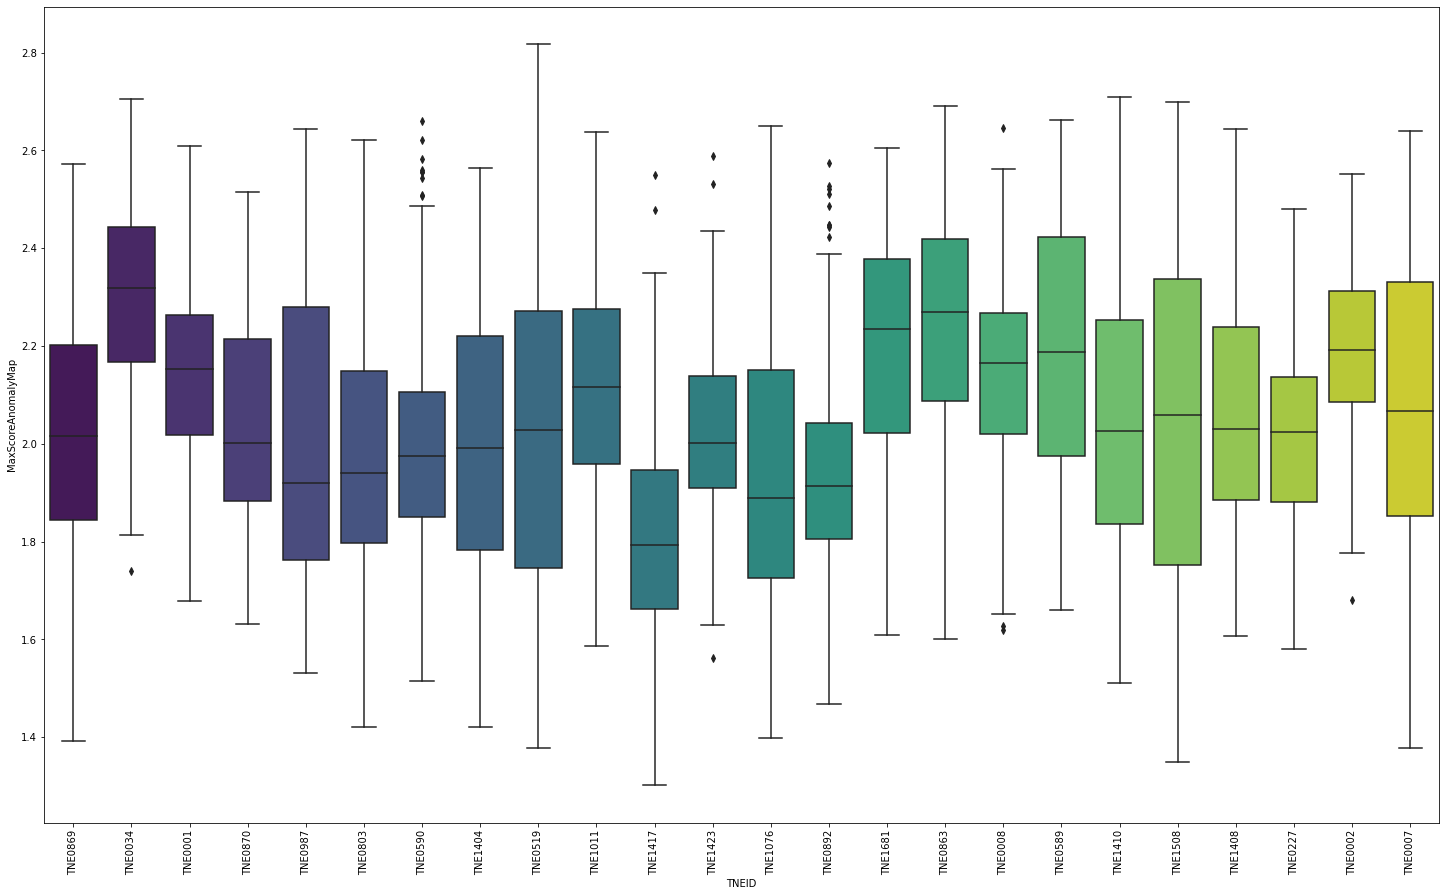

In [56]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

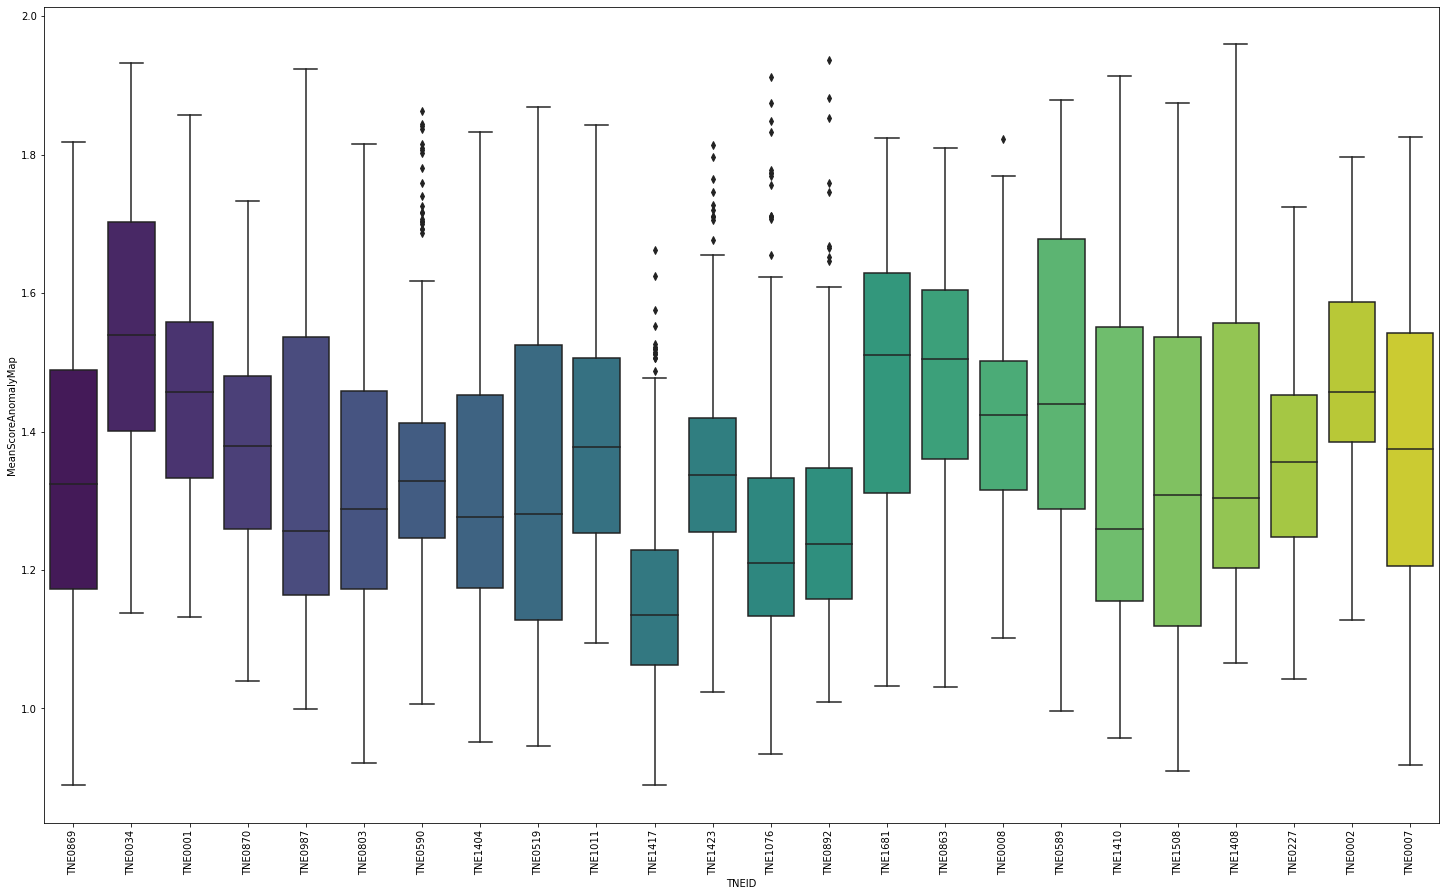

In [57]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['TNEID'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax.tick_params(axis='x', rotation=90)

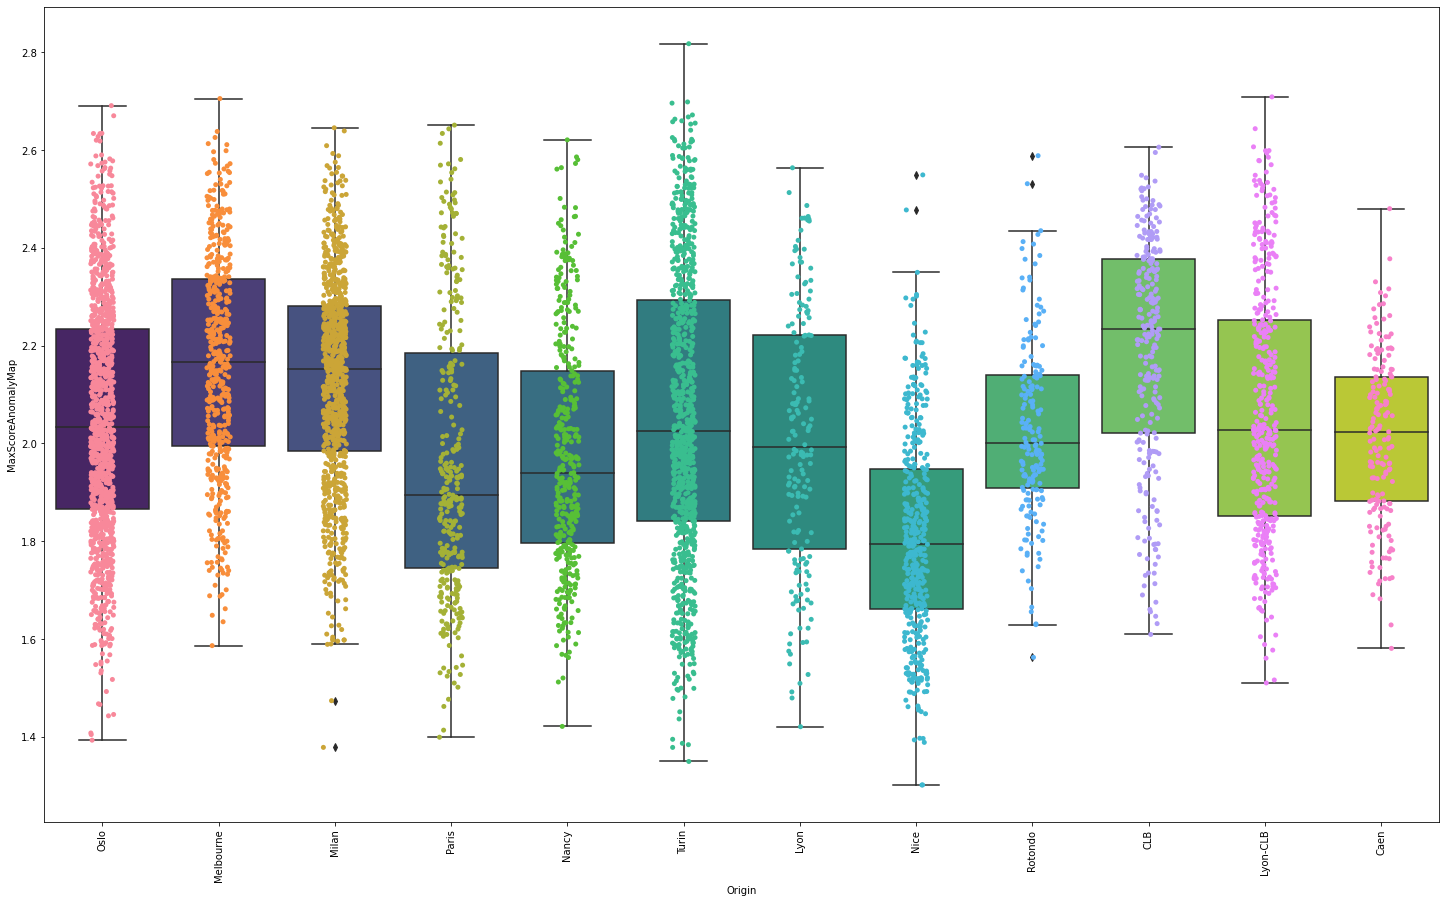

In [58]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['Origin'], y=df_all_test['MaxScoreAnomalyMap'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "MaxScoreAnomalyMap",     data = df_all_test)
ax.tick_params(axis='x', rotation=90)

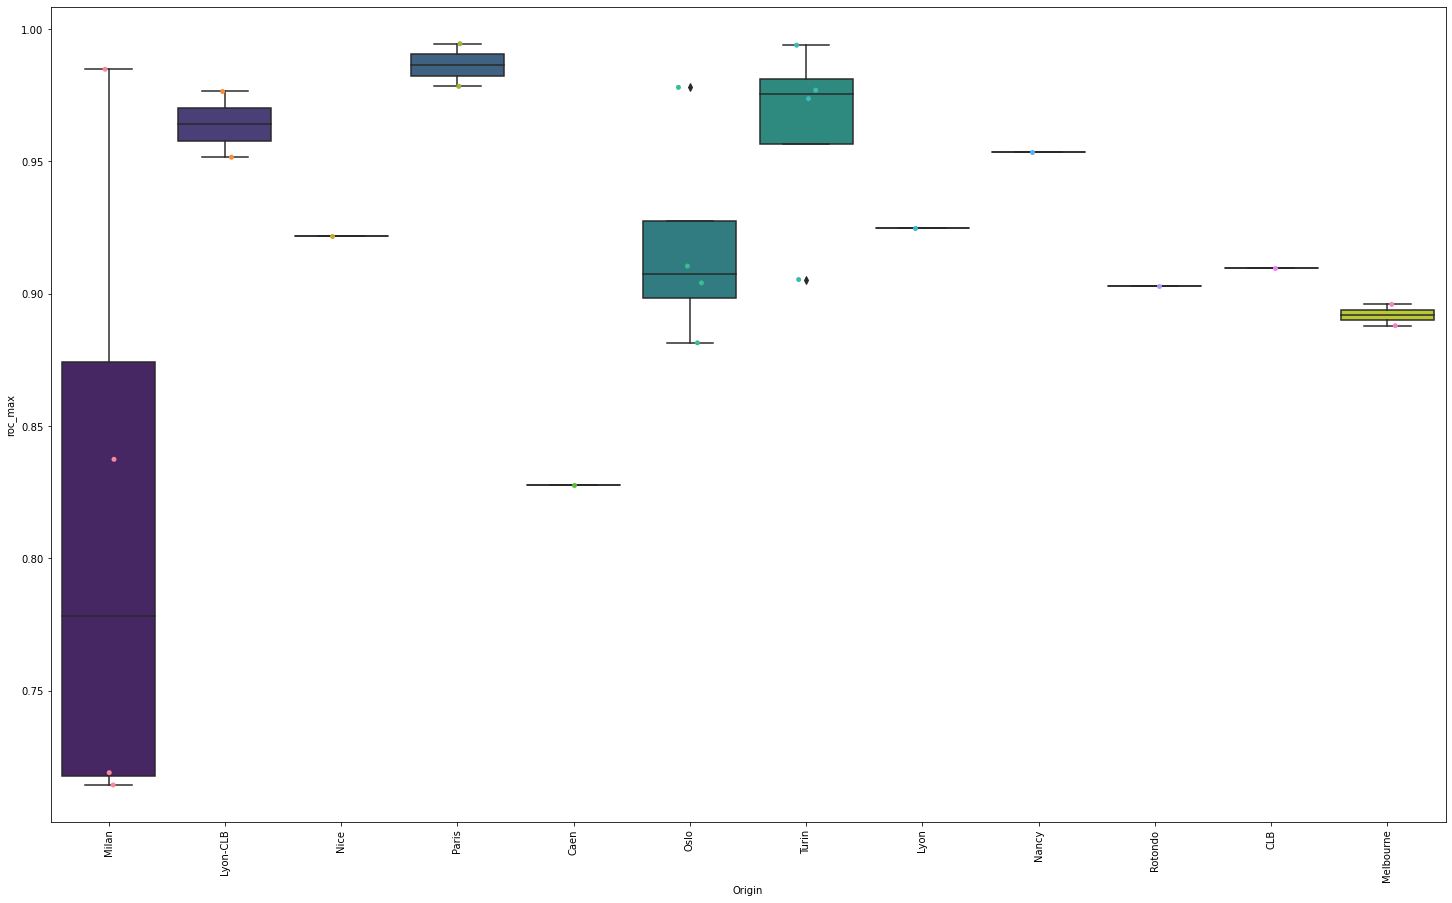

In [59]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=roc_table['Origin'], y=roc_table['roc_max'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "roc_max",     data = roc_table)
ax.tick_params(axis='x', rotation=90)

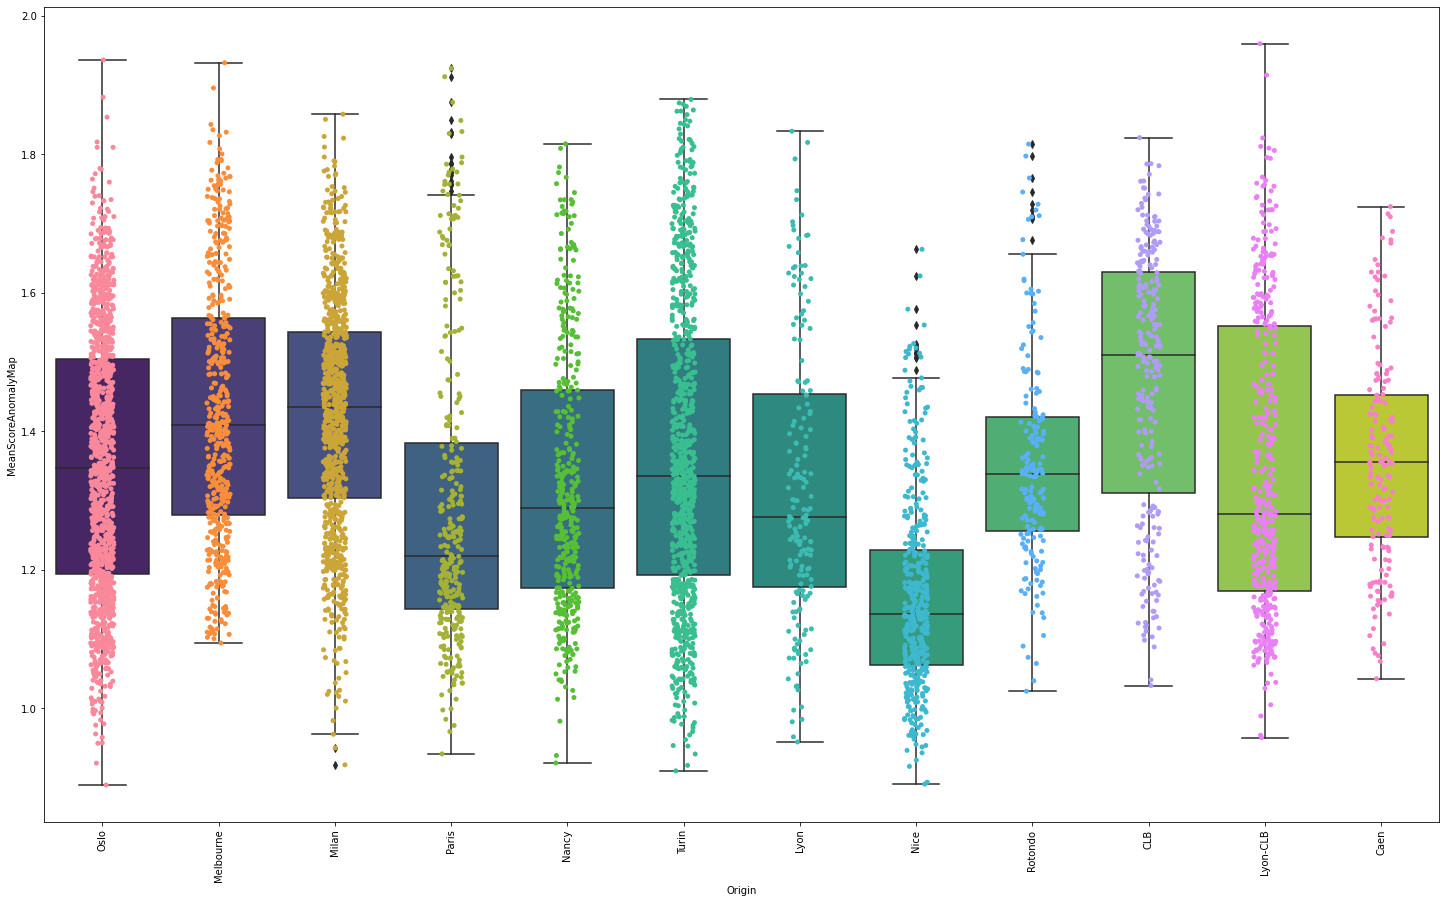

In [60]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=df_all_test['Origin'], y=df_all_test['MeanScoreAnomalyMap'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "MeanScoreAnomalyMap",     data = df_all_test)
ax.tick_params(axis='x', rotation=90)

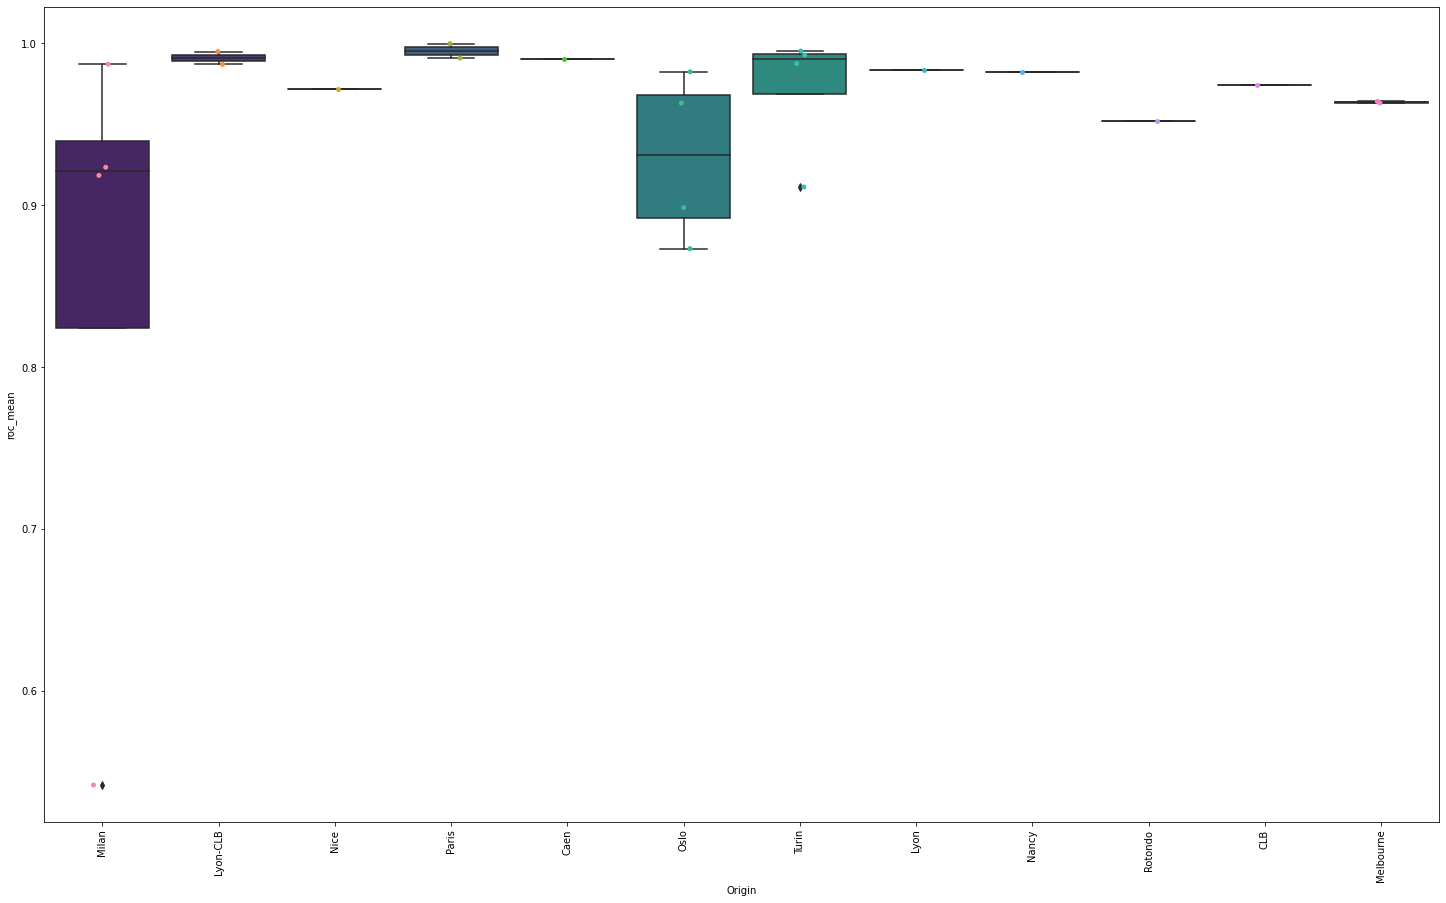

In [61]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x=roc_table['Origin'], y=roc_table['roc_mean'], palette= 'viridis')
ax = sns.stripplot(x = "Origin",      y = "roc_mean",     data = roc_table)
ax.tick_params(axis='x', rotation=90)

In [62]:
origin_l =[]
nb_normal = []
nb_tumor = []
roc_max = []
roc_mean = []
roc_loss = []
roc_max_div_loss = []
for ori in set(df_all_test[df_all_test['Set'] == 'Test']['Origin']):
    print('Origin = ', ori)
    origin_l.append(ori)
    df_all_ori = df_all_test[(df_all_test['Origin'] == ori)]
    print('Normal ', df_all_ori[df_all_ori['Class'] == 'Normal'].shape[0])
    nb_normal.append(df_all_ori[df_all_ori['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_ori[df_all_ori['Class'] == 'Tumor'].shape[0])
    nb_tumor.append(df_all_ori[df_all_ori['Class'] == 'Tumor'].shape[0])
    print('Max ',roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MaxScoreAnomalyMap']))
    roc_max.append(roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MaxScoreAnomalyMap']))
    print('MEan ',roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MeanScoreAnomalyMap']))
    roc_mean.append(roc_auc_score(df_all_ori['BinaryLabels'], df_all_ori['MeanScoreAnomalyMap']))
   
    print('############################### \n')
roc_table = pd.DataFrame()
roc_table['Origin'] = origin_l
roc_table['nb_normal'] = nb_normal
roc_table['nb_tumor'] = nb_tumor       
roc_table['roc_max'] = roc_max
roc_table['roc_mean'] = roc_mean


Origin =  Melbourne
Normal  335
Tumor  185
Max  0.9047196450181526
MEan  0.9655990318676886
############################### 

Origin =  Lyon
Normal  139
Tumor  33
Max  0.9247874427730542
MEan  0.9834314366688468
############################### 

Origin =  Caen
Normal  143
Tumor  26
Max  0.8275954814416353
MEan  0.9905863367401828
############################### 

Origin =  Paris
Normal  259
Tumor  71
Max  0.9859154929577465
MEan  0.9954320517700799
############################### 

Origin =  Turin
Normal  561
Tumor  313
Max  0.9527771608207616
MEan  0.9520311174135644
############################### 

Origin =  Nice
Normal  417
Tumor  21
Max  0.9217768642229074
MEan  0.9720223820943246
############################### 

Origin =  Nancy
Normal  291
Tumor  118
Max  0.9535500029122256
MEan  0.9824684023530782
############################### 

Origin =  CLB
Normal  98
Tumor  158
Max  0.9098424179798501
MEan  0.9743606303280806
############################### 

Origin =  Oslo
Normal  720
Tum

In [63]:
roc_table

,Origin,nb_normal,nb_tumor,roc_max,roc_mean
0,Melbourne,335,185,0.904720,0.965599
1,Lyon,139,33,0.924787,0.983431
2,Caen,143,26,0.827595,0.990586
3,Paris,259,71,0.985915,0.995432
4,Turin,561,313,0.952777,0.952031
5,Nice,417,21,0.921777,0.972022
6,Nancy,291,118,0.953550,0.982468
7,CLB,98,158,0.909842,0.974361
8,Oslo,720,518,0.910674,0.937307
9,Rotondo,154,26,0.902847,0.951798


In [64]:
threshold = np.linspace(np.min(df_all_test['MeanScoreAnomalyMap']), np.max(df_all_test['MeanScoreAnomalyMap']), 500)
precision_list = []
recall_list = []
f1_list = []
roc_list = []
FPR_list = []
TPR_list = []
specifity_list = []
sensitivity_list = []
print(len(threshold))
#df_299 = df_299[(df_299['TNEID'] == 'TNE0001') | (df_299['TNEID'] == 'TNE0803')]
df_MaxAnomalyScore = df_all_test['MeanScoreAnomalyMap']
df_exp_label = df_all_test['BinaryLabels']
for j in range(len(threshold)):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    emp_label = []

    for i in range(df_all_test.shape[0]):
        MSEFM = df_MaxAnomalyScore.iloc[i]
        exp_label = df_exp_label.iloc[i]
        if MSEFM <= threshold[j]:
            empirique_label = 0
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TN += 1
            else:
                FN += 1
        else:
            empirique_label = 1
            emp_label.append(empirique_label)
            if exp_label == empirique_label:
                TP += 1
            else:
                FP += 1
    try :
        precision = TP / (TP + FP)
    except:
        precision = 0
    try:
        recall = TP / (TP + FN) #sensibilite 
    except:
        recall = 0
    try:
        sprecificite = TN / (TN+FP)
    except:
        sprecificite = 0
    try:
        sensitivity = TP/ (TP+FN)
    except:
        sensitivity = 0
    try:
        TPR = TP / (TP + FN)
    except:
        TPR = 0
    try:
        spe = TN/(TN + FP)
    except :
        spe = 0
    try:
        FPR = FP / (FP + TN)
    except:
        FPR = 0
    FPR_list.append(FPR)
    TPR_list.append(TPR)
    specifity_list.append(spe)
    sensitivity_list.append(sensitivity)
    y_true = np.array(df_exp_label.tolist())
    y_scores = np.array(emp_label)
    #roc = roc_auc_score(y_true,y_scores) # ?????
    
    precision_list.append(precision)
    recall_list.append(recall)
    #roc_list.append(roc)

500


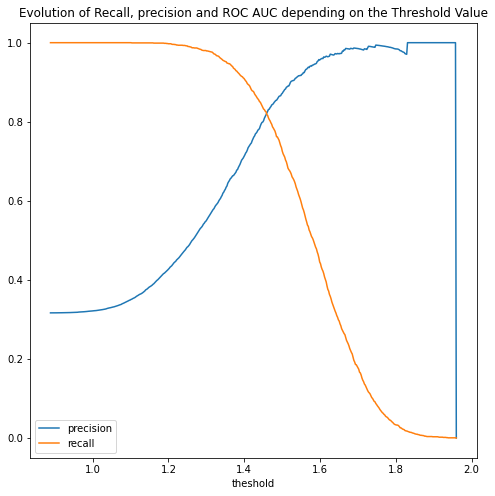

In [65]:
plt.figure(figsize=(8,8))
plt.plot(threshold, precision_list, label='precision')
plt.plot(threshold, recall_list, label='recall')
#plt.plot(threshold, roc_list, label='roc_auc')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

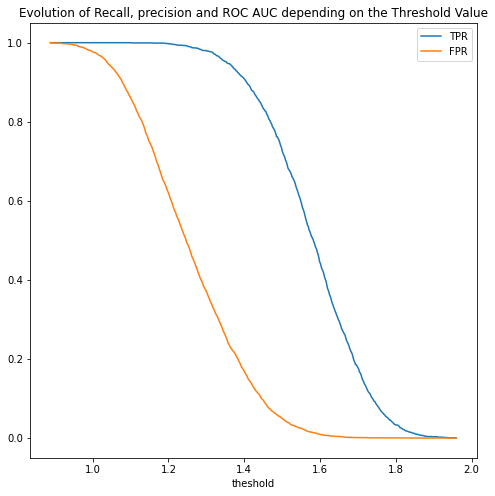

In [66]:
plt.figure(figsize=(8,8))
plt.plot(threshold, TPR_list, label='TPR')
plt.plot(threshold, FPR_list, label='FPR')
plt.legend()
plt.title('Evolution of Recall, precision and ROC AUC depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

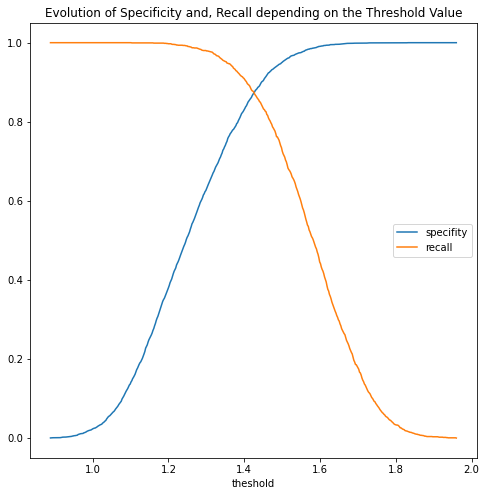

In [67]:
plt.figure(figsize=(8,8))
plt.plot(threshold, specifity_list, label='specifity')
plt.plot(threshold, recall_list, label='recall')
plt.legend()
plt.title('Evolution of Specificity and, Recall depending on the Threshold Value')
plt.xlabel('theshold')
plt.show()

No handles with labels found to put in legend.


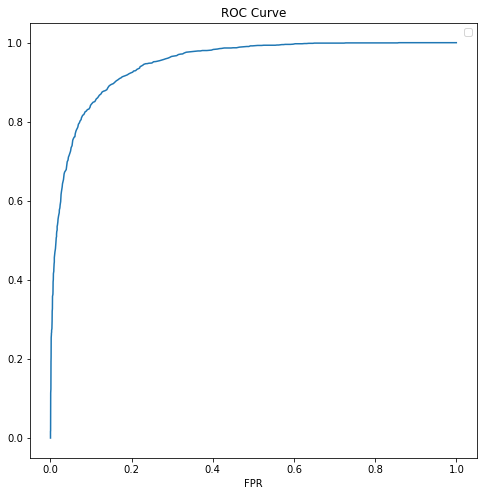

In [68]:
# ROC Curve
plt.figure(figsize=(8,8))
plt.plot(FPR_list, TPR_list)
plt.legend()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.show()

No handles with labels found to put in legend.


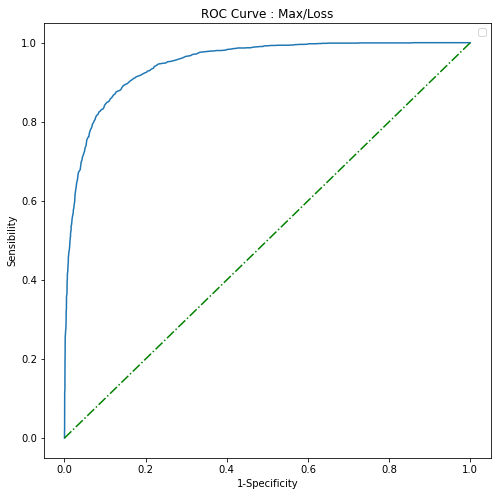

In [69]:
# ROC Curve
x = np.linspace(0,1,100)
y = x
plt.figure(figsize=(8,8))
plt.plot( 1- np.array(specifity_list) , sensitivity_list)
plt.plot(x, y,'-.g')
plt.legend()
plt.title('ROC Curve : Max/Loss')
plt.xlabel('1-Specificity')
plt.ylabel('Sensibility')

plt.show()

## Youden Index

In [70]:
df_metric = pd.DataFrame()
df_metric['threshold'] = threshold
df_metric['Recall'] = TPR_list
df_metric['FPR'] = FPR_list
df_metric['Precison'] = precision_list
df_metric['Specifity'] = specifity_list
df_metric['Sensitivity'] = sensitivity_list
df_metric['Recall/Specifity'] = np.array(TPR_list)/ np.array(specifity_list)

In [71]:
df_metric['YoudenIndex'] = df_metric['Sensitivity'] + df_metric['Specifity'] -1

+ Pr = TP / (TP + FP)
+ Recall = TP  / (TP + FN)


In [72]:
df_metric.head()

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity,YoudenIndex
0,0.888700,1.0,0.999752,0.316593,0.000248,1.0,4029.0,0.000248
1,0.890846,1.0,0.999504,0.316647,0.000496,1.0,2014.5,0.000496
2,0.892993,1.0,0.999255,0.316701,0.000745,1.0,1343.0,0.000745
3,0.895139,1.0,0.999255,0.316701,0.000745,1.0,1343.0,0.000745
4,0.897286,1.0,0.999255,0.316701,0.000745,1.0,1343.0,0.000745


In [73]:
youden_threshold = df_metric[df_metric['YoudenIndex'] == max(df_metric['YoudenIndex'])]['threshold'].values

In [74]:
youden_threshold

array([1.42530591])

In [75]:
max(df_metric['YoudenIndex'])

0.7480552968470549

In [76]:
df_metric[(df_metric['Recall'] < 1) & (df_metric['Recall'] > 0.85)]

,threshold,Recall,FPR,Precison,Specifity,Sensitivity,Recall/Specifity,YoudenIndex
100,1.103342,0.999464,0.855051,0.351224,0.144949,0.999464,6.895275,0.144413
101,1.105489,0.999464,0.849839,0.352619,0.150161,0.999464,6.655935,0.149625
102,1.107635,0.999464,0.846612,0.353487,0.153388,0.999464,6.515924,0.152852
103,1.109782,0.999464,0.842641,0.354563,0.157359,0.999464,6.351484,0.156823
104,1.111928,0.999464,0.838670,0.355645,0.161330,0.999464,6.195140,0.160794
...,...,...,...,...,...,...,...,...
253,1.431745,0.864416,0.118640,0.771401,0.881360,0.864416,0.980775,0.745776
254,1.433892,0.860665,0.116158,0.774349,0.883842,0.860665,0.973776,0.744507
255,1.436038,0.857985,0.112931,0.778696,0.887069,0.857985,0.967214,0.745054
256,1.438184,0.855305,0.111442,0.780440,0.888558,0.855305,0.962577,0.743863


In [77]:
#youden_threshold = -0.000012

In [78]:
classif_best_thr = []
pred_label = []
for i in range(df_all_test.shape[0]):
    if df_all_test.iloc[i,:]['MeanScoreAnomalyMap']  < youden_threshold:
        pred_label.append('Normal')
    else:
        pred_label.append('Tumor')

In [79]:
df_all_test['PredLabel'] = pred_label

In [80]:
df_all_test.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
0,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.232866,1.432099,Test,TNE0869,Tumor,0.001299,Oslo,Tumor
1,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.820434,1.217720,Test,TNE0869,Normal,0.201124,Oslo,Normal
2,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.895194,1.193185,Test,TNE0869,Normal,0.139658,Oslo,Normal
4,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.423360,1.612984,Test,TNE0869,Normal,0.023857,Oslo,Tumor
6,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.162080,1.457609,Test,TNE0034,Tumor,0.011411,Melbourne,Tumor


In [81]:
df_all_test.iloc[0,0]

'/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0869/Tumor/TNE0869_15361_56449.jpg'

In [82]:
df_all_test[(df_all_test['Class'] == 'Tumor')].shape

(1866, 10)

In [83]:
df_all_test[(df_all_test['Class'] == 'Normal')].shape

(4029, 10)

In [84]:
# True positive %
df_all_test[(df_all_test['Class'] == 'Normal') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] / df_all_test[(df_all_test['Class'] == 'Normal')].shape[0]

0.872921320426905

In [85]:
TP  = df_all_test[(df_all_test['Class'] == 'Normal') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] 

In [86]:
# Faux Negatif %
df_all_test[(df_all_test['Class'] == 'Normal') & 
           (df_all_test['PredLabel'] == 'Tumor')].shape[0] /  df_all_test[(df_all_test['Class'] == 'Normal')].shape[0]

0.12707867957309507

In [87]:
FN  = df_all_test[(df_all_test['Class'] == 'Normal') & 
           (df_all_test['PredLabel'] == 'Tumor')].shape[0] 

In [88]:
# Vrai negatif %
df_all_test[(df_all_test['Class'] == 'Tumor') & 
                (df_all_test['PredLabel'] == 'Tumor')].shape[0] / df_all_test[(df_all_test['Class'] == 'Tumor')].shape[0]

0.87513397642015

In [89]:
TN = df_all_test[(df_all_test['Class'] == 'Tumor') & 
                (df_all_test['PredLabel'] == 'Tumor')].shape[0] 

In [90]:
# Faux Positif % 
df_all_test[(df_all_test['Class'] == 'Tumor') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0] / df_all_test[(df_all_test['Class'] == 'Tumor')].shape[0]

0.12486602357984995

In [91]:
FP = df_all_test[(df_all_test['Class'] == 'Tumor') &  
                (df_all_test['PredLabel'] == 'Normal')].shape[0]

In [92]:
# Sensitivity current
#  Out of all the people that have the disease, how many got positive test results?
Sn  = TP / (TP + FN)
print('Sensitivity = '  , Sn)

Sensitivity =  0.872921320426905


In [93]:
# Specificity current
# Out of all the people that do not have the disease, how many got negative results?
Sp = TN / (TN + FP)
print('Specificity = '  , Sp)

Specificity =  0.87513397642015


In [94]:
# Pr current
# Out of all the examples that predicted as positive, how many are really positive?
Pr = TP / (TP + FP)
print('Precision = '  , Pr)


Precision =  0.9378666666666666


In [95]:

for tne in set(df_all_test[df_all_test['Set'] == 'Test']['TNEID']):
    print('TNEID = ', tne)
    print(df_all_test[(df_all_test['TNEID'] == tne)]['Origin'].values[0])
    df_all_test_tne = df_all_test[ (df_all_test['TNEID'] == tne)]
    print('Normal ', df_all_test_tne[df_all_test_tne['Class'] == 'Normal'].shape[0])
    print('Tumor ', df_all_test_tne[df_all_test_tne['Class'] == 'Tumor'].shape[0])
    TP  = df_all_test_tne[(df_all_test_tne['Class'] == 'Normal') &  
                (df_all_test_tne['PredLabel'] == 'Normal')].shape[0] 
    FN  = df_all_test_tne[(df_all_test_tne['Class'] == 'Normal') & 
           (df_all_test_tne['PredLabel'] == 'Tumor')].shape[0] 
    TN = df_all_test_tne[(df_all_test_tne['Class'] == 'Tumor') & 
                (df_all_test_tne['PredLabel'] == 'Tumor')].shape[0] 
    FP = df_all_test_tne[(df_all_test_tne['Class'] == 'Tumor') &  
                (df_all_test_tne['PredLabel'] == 'Normal')].shape[0]
    
    print('Precision =', TP / (TP + FP))
    print('Sensitivity  = ', TP / (TP + FN))
    print('Specificity = ', TN / (TN + FP))
    print('############################### \n')


TNEID =  TNE0008
Milan
Normal  191
Tumor  27
Precision = 0.8909090909090909
Sensitivity  =  0.5130890052356021
Specificity =  0.5555555555555556
############################### 

TNEID =  TNE1408
Lyon-CLB
Normal  123
Tumor  40
Precision = 0.9905660377358491
Sensitivity  =  0.8536585365853658
Specificity =  0.975
############################### 

TNEID =  TNE1417
Nice
Normal  417
Tumor  21
Precision = 0.9854014598540146
Sensitivity  =  0.9712230215827338
Specificity =  0.7142857142857143
############################### 

TNEID =  TNE1410
Lyon-CLB
Normal  156
Tumor  85
Precision = 0.96875
Sensitivity  =  0.9935897435897436
Specificity =  0.9411764705882353
############################### 

TNEID =  TNE0987
Paris
Normal  104
Tumor  40
Precision = 1.0
Sensitivity  =  0.9807692307692307
Specificity =  1.0
############################### 

TNEID =  TNE0227
Caen
Normal  143
Tumor  26
Precision = 1.0
Sensitivity  =  0.8251748251748252
Specificity =  1.0
############################### 

TNEID 

## Misclassified Tumor

In [96]:
miss_tumor = df_all_test[(df_all_test['Class'] == 'Tumor') 
                             &  (df_all_test['PredLabel'] == 'Normal')]

In [97]:
miss_tumor.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
35,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.002000,1.307706,Test,TNE0869,Tumor,0.071237,Oslo,Normal
42,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.161311,1.238522,Test,TNE0863,Tumor,0.011576,Oslo,Normal
96,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.882506,1.376351,Test,TNE0869,Tumor,0.149302,Oslo,Normal
120,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.150835,1.406839,Test,TNE0002,Tumor,0.013940,Milan,Normal
179,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.150822,1.415939,Test,TNE0007,Tumor,0.013943,Milan,Normal


In [98]:
miss_tumor.shape
miss_tumor = miss_tumor.sample(frac=1).reset_index(drop=True)
miss_tumor = miss_tumor.sort_values(by = 'MeanScoreAnomalyMap', ascending=True)

In [99]:
miss_tumor.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
95,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.832269,1.102335,Test,TNE0008,Tumor,0.190648,Milan,Normal
61,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.172035,1.160400,Test,TNE0008,Tumor,0.009383,Milan,Normal
11,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.869986,1.187683,Test,TNE0869,Tumor,0.159134,Oslo,Normal
75,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.918521,1.195189,Test,TNE0869,Tumor,0.122767,Oslo,Normal
28,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,1.888352,1.197984,Test,TNE1417,Tumor,0.144818,Nice,Normal


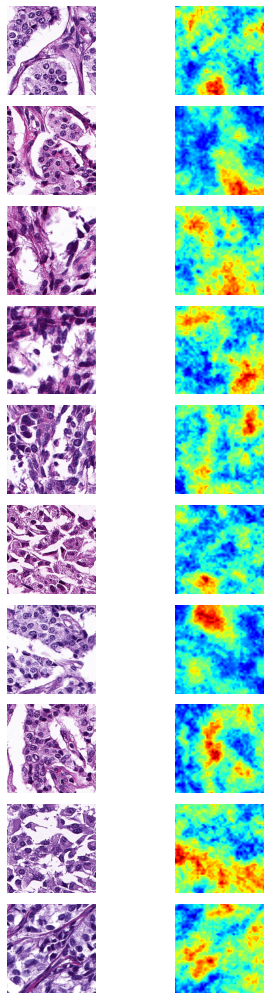

In [100]:
def plot_10_tiles(anom_path, miss_tumor):
    fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(6,14))  
    j = 0 
    i = 0
    for p in miss_tumor['FilesPath'].iloc[:10]:
        im = cv2.imread(p)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        anom_name_c = anom_path  +  str(p.split('/')[-1].split('.')[0]) + '.npy'
        anom_map_im  = np.load(anom_name_c)
        
        axes[i,0].imshow(im) 
        axes[i,0].axis('off')

        axes[i,1].imshow(anom_map_im, cmap = 'jet' ) 
        axes[i,1].axis('off')
        i +=1  
        
        fig.tight_layout()
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Tumor/'

plot_10_tiles(anom_path, miss_tumor)

## Misclassified Normal

In [101]:
miss_normal = df_all_test[(df_all_test['Class'] == 'Normal') & 
                              (df_all_test['PredLabel'] == 'Tumor')]

In [102]:
miss_normal = miss_normal.sort_values(by = 'MeanScoreAnomalyMap', ascending=False)

In [103]:
miss_normal.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
5411,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.695850,1.829243,Test,TNE1508,Normal,0.182284,Turin,Tumor
146,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.457451,1.745131,Test,TNE1508,Normal,0.035550,Turin,Tumor
3445,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.459806,1.726488,Test,TNE1508,Normal,0.036444,Turin,Tumor
5363,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.445397,1.724153,Test,TNE1508,Normal,0.031150,Turin,Tumor
1202,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.201050,1.716684,Test,TNE0590,Normal,0.004604,Turin,Tumor


In [104]:
file_path_miss_norm = []
for i in range(miss_normal.shape[0]):
    file_path_miss_norm.append(miss_normal.iloc[i,0])
file_path_miss_norm

['/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_68737_67585.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33025.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_65665.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33409.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0590/Normal/TNE0590-001_15745_55681.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0227/Normal/TNE0227_14593_14977.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0008/Normal/TNE0008_7297_15361.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE1508/Normal/TNE1508_69121_33793.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalForFastFlow_Vahadane/TNE0034/Normal/TNE0034_23425_4993.jpg',
 '/gpfsscratch/rech/ohv/ueu39kt/Tum

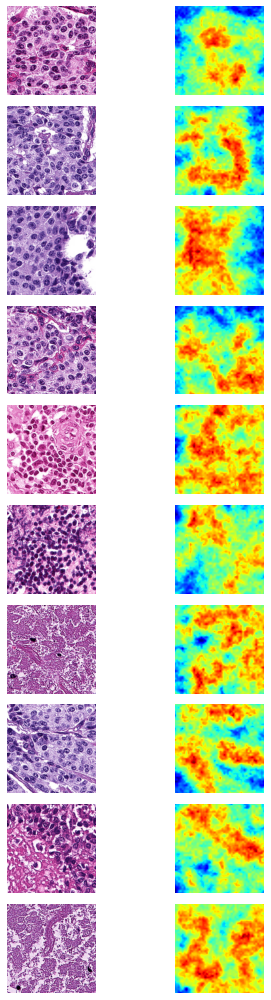

In [105]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Normal/'
plot_10_tiles(anom_path, miss_normal)

## Most discriminant

In [109]:
best_normal = df_all_test[(df_all_test['Class'] == 'Normal') &  
                              (df_all_test['PredLabel'] == 'Normal')]
best_normal = best_normal.sort_values(by = 'MeanScoreAnomalyMap', ascending=True)
best_normal

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
4520,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.407757,0.888700,Test,TNE0869,Normal,0.741572,Oslo,Normal
6032,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.301404,0.889985,Test,TNE1417,Normal,0.936054,Nice,Normal
5922,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.301546,0.892775,Test,TNE1417,Normal,0.935778,Nice,Normal
1401,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.386648,0.909098,Test,TNE1508,Normal,0.778373,Turin,Normal
2289,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,1.661881,0.915648,Test,TNE1417,Normal,0.368475,Nice,Normal
...,...,...,...,...,...,...,...,...,...,...
4263,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.086086,1.424290,Test,TNE0227,Normal,0.033422,Caen,Normal
1293,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.211774,1.424321,Test,TNE0870,Normal,0.003264,Oslo,Normal
1889,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.155757,1.424505,Test,TNE0870,Normal,0.012802,Oslo,Normal
3201,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,0,2.240960,1.424777,Test,TNE0001,Normal,0.000781,Milan,Normal


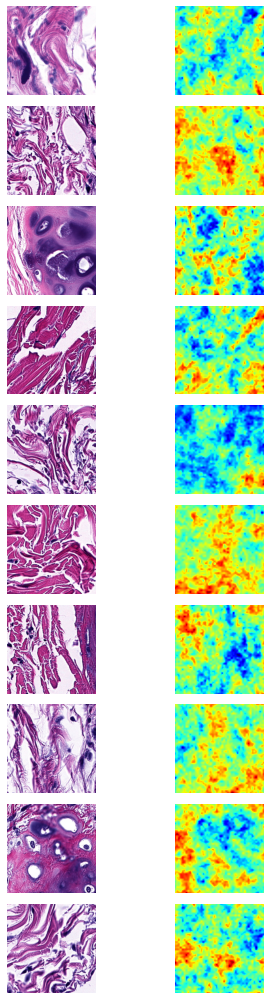

In [111]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Normal/'
plot_10_tiles(anom_path, best_normal)

## Less discriminant

In [112]:
less_discriminant = df_all_test[(df_all_test['Class'] == 'Tumor')
                                    &  (df_all_test['PredLabel'] == 'Tumor')]
less_discriminant = less_discriminant.sort_values(by = 'MeanScoreAnomalyMap', ascending=False)
less_discriminant.head()

,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap,Set,TNEID,Class,MSE,Origin,PredLabel
3161,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.598805,1.959766,Test,TNE1408,Tumor,0.108835,Lyon-CLB,Tumor
1738,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.486123,1.936394,Test,TNE0892,Tumor,0.047185,Oslo,Tumor
2499,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.598531,1.932246,Test,TNE0034,Tumor,0.108655,Melbourne,Tumor
5049,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.470331,1.924155,Test,TNE0987,Tumor,0.040573,Paris,Tumor
1044,/gpfsscratch/rech/ohv/ueu39kt/TumoralNormalFor...,1,2.569881,1.914446,Test,TNE1410,Tumor,0.090588,Lyon-CLB,Tumor


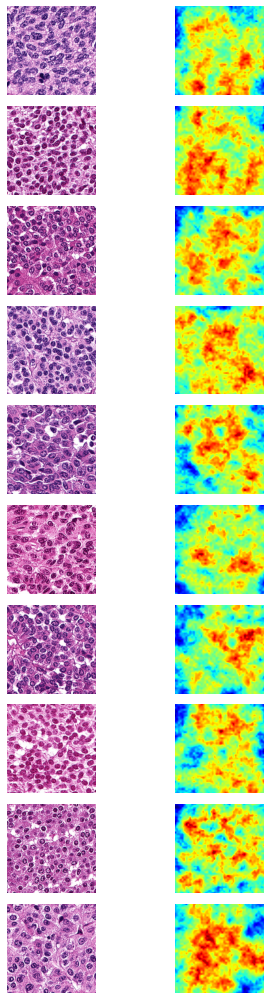

In [114]:
anom_path = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/TumorNormal_test/Tumor/anomaly_map/Tumor/'
plot_10_tiles(anom_path, less_discriminant)